#### 파이썬 이미지 처리 라이브러리인 Pillow 라이브러리를 활용하여 이미지 썸네일/크기변경/이어붙이기/포맷변경을 하는 방법에 대해 살펴본다

## 주요 크롤링 대상
* HTML 문서 + JSON
* 이미지
* PDF, EXCEL 등 여러 정적인 파일들

## 이미지
1. 이미지 다운받기
2. 고화질 이미지를 받더라도 경우에 따라 작은 용량으로 줄일 필요가 있다. -> 썸네일 처리
3. 여러개의 파일로 쪼개진 경우 -> 하나로 합치기
4. 이미지를 다른 포맷으로 변환하기 (jpg, png 등)

## 파이썬 이미지 라이브러리

* Pillow : PIL Fork
* PILKit : PIL 유틸리티 컬렉션
* Wand : ImageMagick 파이썬 바인딩. 고급이미지

## Pillow
* 설치 : pip install pillow
* PIL 프로젝트의 대체 프로젝트 : PIL과 호환됨
* 활용 예 : 이미지 썸네일 생성하기. 다수 이미지 합성하기, 다른 이미지 포맷으로 변환하기, 회전하기 등
* 장고에서는 models.ImageField 필드를 쓸때 pillow 설치 필수
* python imaging Libray Handbook

In [2]:
!pip install pillow

## 웹에서 자주 쓰이는 이미지 포맷
* jpg : 주로 사진을 저장할 때 사용. 손실 포맷이므로 글자가 많은 사진은 사용하지 않는 것이 좋음
    * 이미지 품질 옵션 : 0(저) ~ 100(고)
    * 대개 60~80 선에서 타협
* gif : 움직이는 이미지. 저품질
* png : 투명 지원되는 이미지 포맷

## Case 1) 이미지 다운 받기

In [3]:
import os
import requests

In [13]:
image_url = "https://bit.ly/1KTaQws"
res = requests.get(image_url) # 사이트에 따라 headers 추가 지정 필요
image_data = res.content  # bytes 타입으로 읽어들임

filename = os.path.basename(res.request.url)  # URL에서 파일명을 획득한다.

with open(filename, 'wb') as f:
    f.write(image_data)

In [11]:
res.request.url

'https://ee5817f8e2e9a2e34042-3365e7f0719651e5b8d0979bce83c558.ssl.cf5.rackcdn.com/python.png'

In [14]:
from IPython.display import Image

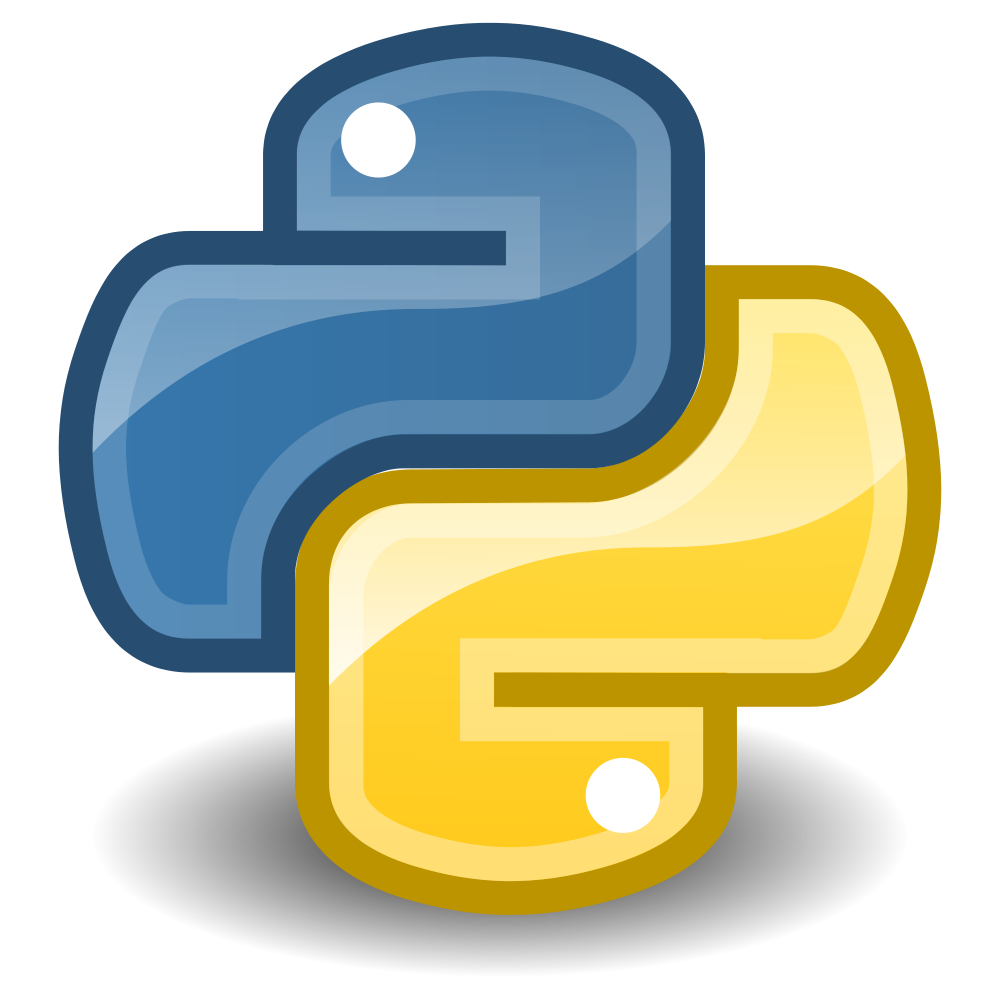

In [15]:
Image(filename)

## Case 2) 이미지 품질 낮추기 / 포맷 변경
이미지 모드 : RGB, RGBA, CMYK


In [18]:
from PIL import Image

with Image.open('python.png') as im:
    print(im)
    print(im.size)

<PIL.PngImagePlugin.PngImageFile image mode=RGBA size=1000x1000 at 0x10AB48D68>
(1000, 1000)


In [22]:
with Image.open('python.png') as im:
    im = im.convert('RGB') # RGBA를 RGB로 변환
    for quality in range(0, 100, 20):
        im.save('python-quality-{}.jpg'.format(quality), quality=quality)

In [23]:
%ls -l *quality*

-rw-r--r--  1 imjunghee  staff  45401 10 18 00:01 python-quality-0.jpg
-rw-r--r--  1 imjunghee  staff  26235 10 18 00:01 python-quality-20.jpg
-rw-r--r--  1 imjunghee  staff  32743 10 18 00:01 python-quality-40.jpg
-rw-r--r--  1 imjunghee  staff  38154 10 18 00:01 python-quality-60.jpg
-rw-r--r--  1 imjunghee  staff  49714 10 18 00:01 python-quality-80.jpg


In [27]:
LIGHT_YELLOW = (255, 255, 244)  # RGB color

with Image.open('python.png') as im:
    with Image.new('RGBA', im.size, LIGHT_YELLOW) as CANVAS: # RGBA 형태로 주어진 사이즈로 빈 CANVAS를 만들고 주어진 컬러를 부여함
        # alpha채널을 살리며 CANVAS 베이스에 im을 합성
        canvas_im = Image.alpha_composite(CANVAS, im)
        canvas_im.save('python_bg_yellow.png')

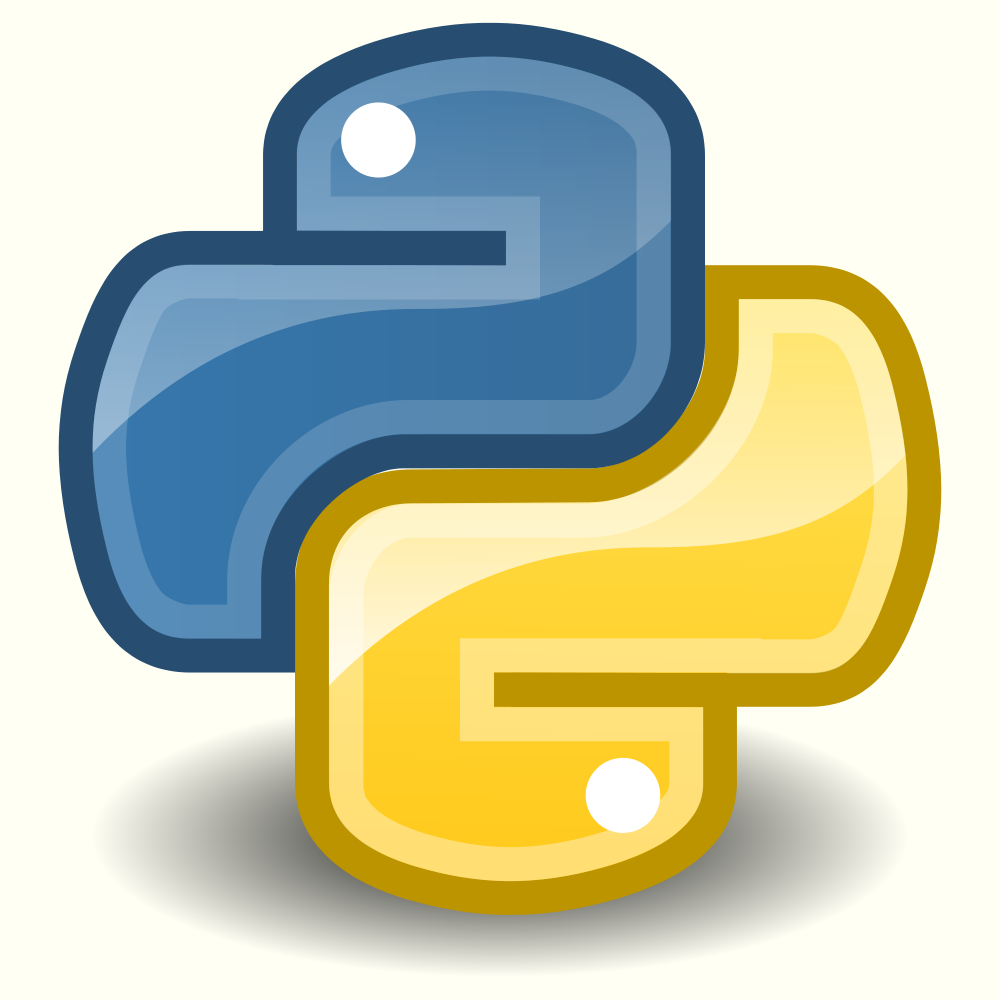

In [29]:
from IPython.display import Image
Image('python_bg_yellow.png')  # 바탕이 yellow로 변환됨

### 참고 : 이미지 포맷별 최대 지원 크기

* jpg : 2^16 - 1(65,535) 픽셀
* png
    * 2^13 - 1 (2,147,483,647) 픽셀(signed)

## Case 3) 이미지 가로 / 세로 크기 줄이기
* resize(size, resample=0)
    * 리사이징된 Image 복사본 생성
    * 원본의 가로 / 세로 비율 무시, 지정된 크기로 강제 리사이징
* thumbnail(size, resample=3)
    * 원본 "Image" 객체를 변경
    * 원본의 가로 / 세로 비율을 유지하면서 지정된 크기로 리사이징
    
* 이미지는 크기를 줄이거나 늘리거나 혹은 약간의 변경도 모두 손실된다.

### 썸네일

In [30]:
from PIL import Image

with Image.open('python.png') as im:
    with Image.new('RGBA', im.size, LIGHT_YELLOW) as CANVAS: # RGBA 형태로 주어진 사이즈로 빈 CANVAS를 만들고 주어진 컬러를 부여함
        # alpha채널을 살리며 CANVAS 베이스에 im을 합성
        canvas_im = Image.alpha_composite(CANVAS, im)
        canvas_im.thumbnail((300, 300))  # size 지정
        canvas_im.save('python_bg_yellow.png')

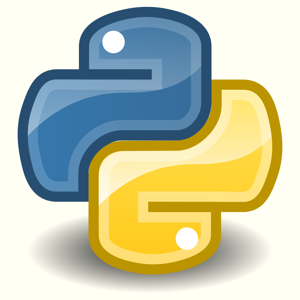

In [31]:
from IPython.display import Image as displayImage

displayImage('python_bg_yellow.png')

## Case 4) 이미지 이어 붙이기

In [38]:
### 네이버 웹툰 이미지 로컬에 다운받기
import os
import requests
from bs4 import BeautifulSoup

ep_url = "https://comic.naver.com/webtoon/detail.nhn?titleId=20853&no=1196&weekday=tue"
html = requests.get(ep_url).text
soup = BeautifulSoup(html, 'html.parser')

img_names = []
for tag in soup.select('.wt_viewer img'):
    img_url = tag['src']
    img_name = os.path.basename(img_url)
    img_names.append(img_name)
    
    headers = {'Referer': ep_url}
    img_data = requests.get(img_url, headers=headers).content
    
    with open(img_name, 'wb') as f:
        f.write(img_data)

In [37]:
img_name

'20191014160610_12455c2a0d6e1fe378f401b5069eaca1_IMAG01_34.jpg'

In [61]:
from PIL import Image

WHITE = (255, 255, 255)

with Image.open(img_names[0]) as im1:
    with Image.open(img_names[1]) as im2:
    # 이미지 2개를 세로로 이어서 붙이기
        width = max(im1.width, im2.width)
        height = sum((im1.height, im2.height))
        size = (width, height)
            
        with Image.new('RGB', size, WHITE) as canvas:
            canvas.paste(im1, box=(0, 0))           # left/top 지정
            canvas.paste(im2, box=(0, im1.height))  # left/top 지정
            canvas.save('canvas.jpg')

In [62]:
for i in range(len(img_names) - 2):
    with Image.open("canvas.jpg") as im1:
        with Image.open(img_names[i+1]) as im2:
        # 이미지 2개를 세로로 이어서 붙이기
            width = max(im1.width, im2.width)
            height = sum((im1.height, im2.height))
            size = (width, height)
        
            with Image.new('RGB', size, WHITE) as canvas:
                canvas.paste(im1, box=(0, 0))           # left/top 지정
                canvas.paste(im2, box=(0, im1.height))  # left/top 지정
                canvas.save('canvas.jpg')


In [67]:
with Image.open('canvas.jpg') as im:
    im.thumbnail((400, 2000))
    im.save('canvas-thumb.jpg')
    
displayImage('canvas-thumb.jpg')